##**Regularization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

###**Accessing the dataset**


In [ ]:
from tensorflow.keras.datasets.mnist import load_data

(X_tr, y_tr), (X_te, y_te) = load_data()

In [ ]:
# Checking the shape of the train and test data

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_tr[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

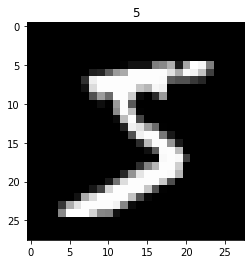

In [ ]:
# Visualization

plt.imshow(X_tr[0], 'gray')
plt.title(y_tr[0]);

### **Building the basic model**

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3320 - accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3456 - accuracy: 0.9251
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.9369
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9413
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2345 - accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2162 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2054 - accuracy: 0.9548
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2001 - accuracy: 0.9559
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1936 - accuracy: 0.9590
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.185

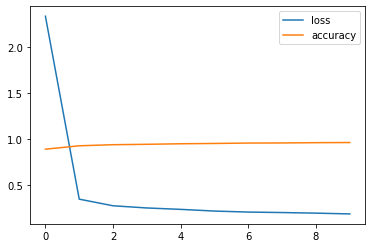

In [ ]:
mod_1 = tf.keras.Sequential()
mod_1.add(tf.keras.layers.Flatten())
mod_1.add(tf.keras.layers.Dense(300, activation = 'relu'))
mod_1.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model
tf.random.set_seed(100)
hist_1 = mod_1.fit(X_tr, y_tr, epochs = 10)
pd.DataFrame(hist_1.history).plot();

In [ ]:
# Evaluating the model

mod_1.evaluate(X_te, y_te)

313/313 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.9537


[0.31031742691993713, 0.9537000060081482]

#### **Remark 1:**

Basic Model: Training Loss = 0.1852, Test Loss = 0.3103 (Overfitting)

###**2. Model with Normalized Data**

In [ ]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_tr)
normalizer.adapt(X_te)
X_tr = normalizer(X_tr)
X_te = normalizer(X_te)
X_tr[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-01, -4.51524764e-01,
        -3.54017019e-01, -2.68543184e-01, -1.91750199e-01,
        -1.24660455e-01, -6.43352345e-02, -2.87100654e-02,
        -8.99783615e-03],
       [-3.29633080e-03, -1.03209605e-02, -2.63224952e-02,
        -5.94727769e-02, -1.16537198e-01, -1.97390229e-01,
        -2.83805698e-01, -3.79412591e-01, -4.77584034e-01,
        -5.62326729e-01, -6.23078227e-01, -6.59251928e-01,
        -6.87425375e-01, -7.26367414e-01, -7.58370578e-01,
        -7.74074256e-01, -7.61724949e-01, -7.22140551e-01,
        -6.51364148e-01, -5.54406047e-0

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2092 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0184 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.017

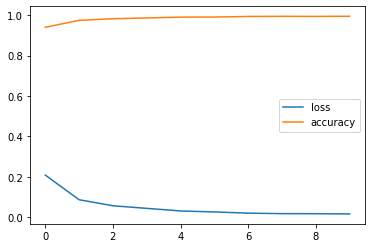

In [ ]:
# Building the new model

mod_2 = tf.keras.Sequential()
mod_2.add(tf.keras.layers.Flatten())
mod_2.add(tf.keras.layers.Dense(300, activation = 'relu'))
mod_2.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model
tf.random.set_seed(100)
hist_2 = mod_2.fit(X_tr, y_tr, epochs = 10)
pd.DataFrame(hist_2.history).plot();

In [ ]:
# Evaluating the model

mod_2.evaluate(X_te, y_te)

313/313 [==============================] - 1s 4ms/step - loss: 0.1470 - accuracy: 0.9788


[0.14703814685344696, 0.9787999987602234]

#### **Remark 2:**

New Model: Training Loss = 0.0170, Test Loss = 0.1470 (Overfitting has reduced)


###**Model with Validation Dataset**

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.1124 - val_accuracy:

[0.14034612476825714, 0.9761999845504761]

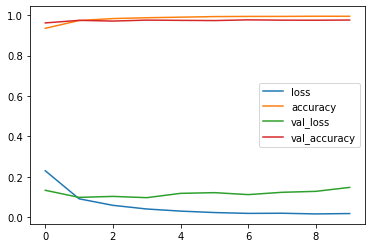

In [ ]:
# Building the new model

mod_3 = tf.keras.Sequential()
mod_3.add(tf.keras.layers.Flatten())
mod_3.add(tf.keras.layers.Dense(300, activation = 'relu'))
mod_3.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model
tf.random.set_seed(100)

# Validation of the dataset
hist_3 = mod_3.fit(X_tr, y_tr, epochs = 10, validation_split = 0.2)
pd.DataFrame(hist_3.history).plot();

# Evaluating the model
print ("\n The result of evaluation: \n")
mod_3.evaluate(X_te, y_te)


#### **Remark 3:**

Validated Model: Training Loss = 0.1481, Test Loss = 0.1403 (Overfitting has significantly reduced)

###**Model with Dropout**

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2436 - accuracy: 0.9305 - val_loss: 0.1401 - val_accuracy: 0.9601
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9690 - val_loss: 0.0954 - val_accuracy: 0.9719
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.9788 - val_loss: 0.0934 - val_accuracy: 0.9734
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.1050 - val_accuracy: 0.9737
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.1014 - val_accuracy: 0.9757
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.1140 - val_accuracy: 0.9746
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9902 - val_loss: 0.1100 - val_accuracy:

[0.14748935401439667, 0.9753999710083008]

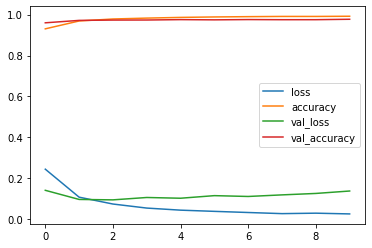

In [ ]:
# Building the new model

mod_4 = tf.keras.Sequential()
mod_4.add(tf.keras.layers.Flatten())
mod_4.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Adding the drop out layers
mod_4.add(tf.keras.layers.Dropout(0.1))
mod_4.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Training the model
tf.random.set_seed(100)

# Validation of the dataset
hist_4 = mod_4.fit(X_tr, y_tr, epochs = 10, validation_split = 0.2)
pd.DataFrame(hist_4.history).plot();

# Evaluating the model
print ("\n The result of evaluation: \n")
mod_4.evaluate(X_te, y_te)

####**Remark 4**

Train Loss = 0.0246 and Test Loss = 0.1475. The model is Overfitting

###**Model with Early Stopping**

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2303 - accuracy: 0.9348 - val_loss: 0.1338 - val_accuracy: 0.9614
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9742
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9829 - val_loss: 0.1035 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0972 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.1186 - val_accuracy: 0.9741
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1221 - val_accuracy: 0.9731

 The result of evaluation: 

313/313 [==============================] - 1s 2ms/step - loss: 0.1281 - accuracy: 0.9729


[0.12814894318580627, 0.9728999733924866]

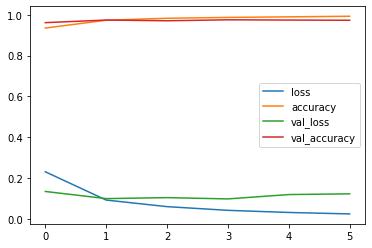

In [ ]:
# Building the new model

mod_5 = tf.keras.Sequential()
mod_5.add(tf.keras.layers.Flatten())
mod_5.add(tf.keras.layers.Dense(300, activation = 'relu'))
mod_5.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model
tf.random.set_seed(100)

# Validation of the dataset along with callback
hist_5 = mod_5.fit(X_tr, y_tr, epochs = 10, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_5.history).plot();

# Evaluating the model
print ("\n The result of evaluation: \n")
mod_5.evaluate(X_te, y_te)

####**Remark 5**

Model with Early Stop stops the model iteration at epochs = 6. Train Loss = 0.0257 while Test loss = 0.1281. The model is overfitting, although the Validation loss has decreased as compared to the earlier model. The model is comparatively better.

###**Model with Batch Normalization**

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2505 - accuracy: 0.9266 - val_loss: 0.1500 - val_accuracy: 0.9624
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1163 - accuracy: 0.9654 - val_loss: 0.1802 - val_accuracy: 0.9683
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0871 - accuracy: 0.9736 - val_loss: 0.1132 - val_accuracy: 0.9724
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.1028 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.1570 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.1737 - val_accuracy: 0.9728

 The result of evaluation: 

313/313 [==============================] - 1s 2ms/step - loss: 0.1565 - accuracy: 0.9727


[0.15648391842842102, 0.9726999998092651]

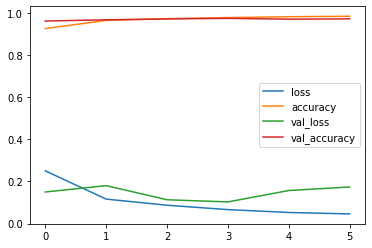

In [ ]:
# Building the new model

mod_6 = tf.keras.Sequential()
mod_6.add(tf.keras.layers.Flatten())
mod_6.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Batch Normalization
mod_6.add(tf.keras.layers.BatchNormalization())

mod_6.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model
tf.random.set_seed(100)

# Validation of the dataset along with callback
hist_6 = mod_6.fit(X_tr, y_tr, epochs = 10, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_6.history).plot();

# Evaluating the model
print ("\n The result of evaluation: \n")
mod_6.evaluate(X_te, y_te)

####**Remarks 6**

The train loss = 0.0458 while test loss = 0.1565. The model is not good as compared to Early Stop.

###**Increasing the Hidden Layers**

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2268 - accuracy: 0.9342 - val_loss: 0.1440 - val_accuracy: 0.9568
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0938 - accuracy: 0.9710 - val_loss: 0.1091 - val_accuracy: 0.9670
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.1070 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.1046 - val_accuracy: 0.9743
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.1348 - val_accuracy: 0.9684
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.1036 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.1188 - val_accuracy:

[0.13746748864650726, 0.975600004196167]

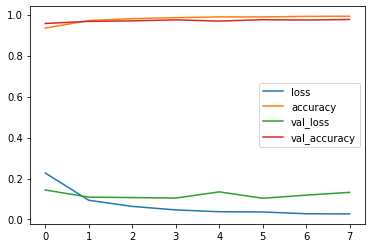

In [ ]:
# Building the new model

mod_7 = tf.keras.Sequential()

# Flattening of the input data
mod_7.add(tf.keras.layers.Flatten())

# Adding the Hidden Layer
mod_7.add(tf.keras.layers.Dense(300, activation = 'relu'))

# Increasing the hidden layer
mod_7.add(tf.keras.layers.Dense(150, activation = 'relu'))

# Output layer
mod_7.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_7.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model
tf.random.set_seed(100)

# Validation of the dataset along with callback
hist_7 = mod_7.fit(X_tr, y_tr, epochs = 10, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_7.history).plot();

# Evaluating the model
print ("\n The result of evaluation: \n")
mod_7.evaluate(X_te, y_te)

####**Remarks 7**

There is no improvement with the increase of hidden layer.

###**Changing the no of units in the Hidden Layer**

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9107 - val_loss: 0.1931 - val_accuracy: 0.9446
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9583 - val_loss: 0.1376 - val_accuracy: 0.9595
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9700 - val_loss: 0.1305 - val_accuracy: 0.9607
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.1230 - val_accuracy: 0.9641
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9805 - val_loss: 0.1248 - val_accuracy: 0.9664
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.1286 - val_accuracy: 0.9643

 The result of evaluation: 

313/313 [==============================] - 1s 1ms/step - loss: 0.1277 - accuracy: 0.9656


[0.12774796783924103, 0.9656000137329102]

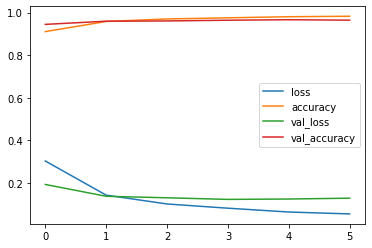

In [ ]:
# Building the new model

mod_8 = tf.keras.Sequential()

# Flattening of the input data
mod_8.add(tf.keras.layers.Flatten())

# Adding the Hidden Layer
mod_8.add(tf.keras.layers.Dense(50, activation = 'relu'))

# Output layer
mod_8.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Compiling the model
mod_8.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

# Early Stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

# Training the model
tf.random.set_seed(100)

# Validation of the dataset along with callback
hist_8 = mod_8.fit(X_tr, y_tr, epochs = 10, validation_split = 0.2, callbacks = [early_stop])
pd.DataFrame(hist_8.history).plot();

# Evaluating the model
print ("\n The result of evaluation: \n")
mod_8.evaluate(X_te, y_te)

####**Remark 8**

The test loss has decreased and this is the best model.

###**Saving the Model**

In [ ]:
mod_8.save('best_mnist_model.h5')

###**Loading the model**

In [ ]:
my_mnist = tf.keras.models.load_model('best_mnist_model.h5')

In [ ]:
# Evaluating the model
my_mnist.evaluate(X_te, y_te)

313/313 [==============================] - 1s 2ms/step - loss: 0.1277 - accuracy: 0.9656


[0.12774796783924103, 0.9656000137329102]